# Ejemplo de clasificacion RN

In [1]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

### Datos

In [3]:
# Generamos los datos
X, y = make_blobs(1000, 2, centers=3, random_state=1, cluster_std=1.2)

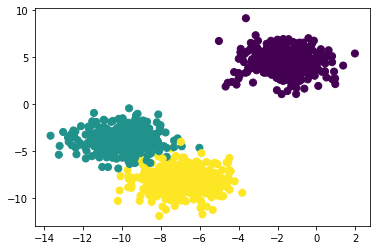

In [4]:
# Graficamos
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

## Train and test

In [5]:
# Dividimos nuestros datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.75 ,random_state=0)

### Modelo

In [6]:
# Importamos la función para CLASIFICACIÓN
from sklearn.neural_network import MLPClassifier

In [7]:
# Creamos un modelo con una sola capa
modelo_1 = MLPClassifier(hidden_layer_sizes=(5),  # una capa con 5 neuronas
                         learning_rate_init=0.01, # cómo de rápido pueden cambiar los hiperp. a medida que aprende el modelo.
                         solver = 'lbfgs',        # algoritmo de optimización, para sets pequeños este es mejor
                         max_iter = 1000,         # num max de iteraciones de entrenamiento
                         random_state = 123)      # semilla de aleatoriedad

In [8]:
# Ajustamos el modelo a los datos de entrenamiento
modelo_1.fit(Xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=5, learning_rate_init=0.01, max_iter=1000,
              random_state=123, solver='lbfgs')

## Evaluación del modelo

In [9]:
# Realizamos predicciones usando los datos de prueba
y_pred = modelo_1.predict(Xtest)

In [10]:
# Acuraccy 
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_pred)

0.984

In [11]:
# El acuraccy es de un buen nivel

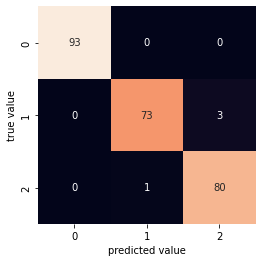

In [12]:
# Matriz de confusión
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [20]:
# Pese a que las predicciones son buenas, veremos si podemos mejorar el modelo.

## Optimización de hiperparámetros

In [13]:
from sklearn.model_selection import RandomizedSearchCV

# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {'hidden_layer_sizes': [(10), (10, 10), (20, 20)],
                       'alpha': np.logspace(-3, 3, 7),
                       'learning_rate_init': [0.001, 0.01, 0.1]}


In [14]:
# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(estimator = MLPClassifier(solver = 'lbfgs', max_iter= 2000),
                          param_distributions = param_distributions,
                          n_iter = 50, # Número máximo de combinaciones probadas
                          scoring = 'accuracy',
                          cv = 3,
                          random_state = 123)


grid.fit(X = Xtest, y = ytest);

In [15]:
# Los mejores parámetros
grid.best_params_

{'learning_rate_init': 0.1, 'hidden_layer_sizes': (10, 10), 'alpha': 0.1}

In [16]:
# El modelo con los mejores parámetros está almacenado en:
modelo_final = grid.best_estimator_
modelo_final

MLPClassifier(alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate_init=0.1,
              max_iter=2000, solver='lbfgs')

## Evaluación del modelo con los mejores hiperparámetros

In [17]:
# Realizamos predicciones usando los datos de prueba
y_pred2 = modelo_final.predict(Xtest)

In [18]:
# Acuraccy 
accuracy_score(ytest, y_pred2)

0.996

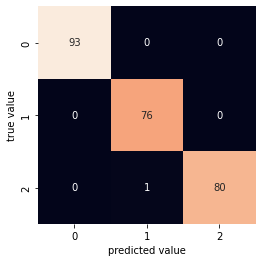

In [19]:
# Matriz de confusión
mat2 = confusion_matrix(ytest, y_pred2)
sns.heatmap(mat2, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

El primer modelo clasificaba incorrectamente 4 valores, mientras que este último solo clasifica incorrectamente mal uno solo.